# Hola Ilse! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>


## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Buen trabajo Ilse, tu notebook está correcto excepto en la parte del cálculo de beneficio y bootstrapping. Te dejé comentarios en esas secciones para que realices las correcciones correspondientes.
    
Saludos!    

</div>

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Bien hecho Ilse, las correcciones realizadas están muy bien. Has completado el notebook, no tengo más comentarios realizar, está aprobado.
    
Saludos!    

</div>

----

# Proyecto Sprint 10 - Ilse Salinas
## Descripción general
Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

Para completar esta tarea, tendrás que realizar los siguientes pasos:
- Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.
- Crear un modelo para predecir el volumen de reservas en pozos nuevos.
- Elegir los pozos petrolíferos que tienen los valores estimados más altos.
- Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.

Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

**Condiciones**

- Solo se debe usar la regresión lineal para el entrenamiento del modelo.
- Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
- El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
- Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
- Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.

Los datos son sintéticos: los detalles del contrato y las características del pozo no se publican.

**Descripción de datos**

Los datos de exploración geológica de las tres regiones se almacenan en archivos:
- geo_data_0.csv.
- geo_data_1.csv.
- geo_data_2.csv.
- id — identificador único de pozo de petróleo
- f0, f1, f2 — tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas)
- product — volumen de reservas en el pozo de petróleo (miles de barriles).

### Preprocesamiento de la información

En este primer paso se descargarán y prepararán los datos de cada dataframe del proyecto con el fin de verificar que la información no cuente con errores o esté duplicada. A continuación se importarán las liberías que se estarán ocupando a lo largo del proyecto junto con la información de cada dataframe desplegada. 

In [1]:
# Importar las librerias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import bootstrap

In [2]:
# Cargar los datos
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

# Imprimir informacion de los datos
data_0.info()
print()
data_1.info()
print()
data_2.info()
print()

# Mostramos las primeras filas de cada conjunto de datos para verificar su contenido
display(data_0.head(), data_1.head(), data_2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Nul

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Se puede observar que cada uno de los dataframes contiene información de 100,000 pozos siendo un total de 300,000 pozos de los cuales se despliega información sobre su identificador único y características relevantes para su elección. Hay que verificar si en cada dataframe existen pozos cuyo identificador esté repetido, pero antes hay que pasar estos nombres a minúsculas para realizar dicha verificación además de que de esta forma es más legible. 

In [3]:
# Pasamos los identificadores a minusuclas de todos los dataframes
data_0['id'] = data_0['id'].str.lower()
data_1['id'] = data_1['id'].str.lower()
data_2['id'] = data_2['id'].str.lower()

print('Se han convertido los datos de las columnas id de cada dataframe a minuscula.') 

Se han convertido los datos de las columnas id de cada dataframe a minuscula.


<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ok, pero la columna id no tiene mucha utilidad. De hecho, creo que este cambio no le hace muy bien dado que son códigos donde al parecer las mayúsculas importan. No es buena idea modificar la data de esta forma sin una buena razón para ello.

</div>

#### Dataframe data_0

En la siguiente sección del preprocesamiento de los datos de cada dataframe, se estará revisando si existen anomalías o errores en la información que pudieran repercutir en la generación del modelo y resultados. Como se mencionó anteriormente, primero se buscará en cada dataframe si existen valores nulos o repetidos y también se analizarán los datos mediante gráficas para observar como se distribuyen e identificar valores atípicos para descartalos.

In [4]:
# Verificar si hay valores nulos en data_0
if data_0.isnull().values.any():
    print("Hay valores nulos en data_0.")
else:
    print("No hay valores nulos en data_0.")

# Verificar duplicados en data_0
if data_0.duplicated().any():
    print("Hay filas duplicadas en data_0.")
else:
    print("No hay filas duplicadas en data_0.")

No hay valores nulos en data_0.
No hay filas duplicadas en data_0.


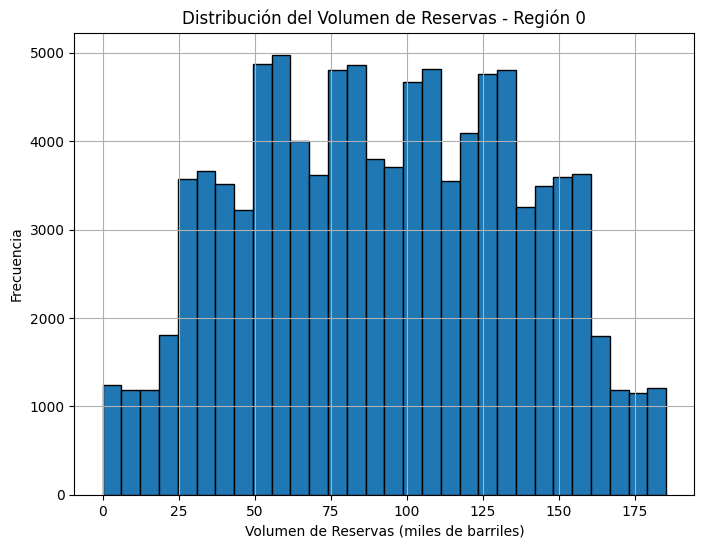

In [5]:
# Histograma del volumen de reservas
plt.figure(figsize=(8, 6))
plt.hist(data_0['product'], bins=30, edgecolor='black')
plt.title('Distribución del Volumen de Reservas - Región 0')
plt.xlabel('Volumen de Reservas (miles de barriles)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [6]:
# Encontrar el valor más pequeño (mínimo) en la columna 'product'
min_value = data_0['product'].min()

# Encontrar el valor más grande (máximo) en la columna 'product'
max_value = data_0['product'].max()

# Encontrar el valor promedio en la columna 'product'
avg_value = data_0['product'].mean()

print(f"Valor mínimo en 'product': {min_value}")
print(f"Valor máximo en 'product': {max_value}")
print(f"Valor promedio en 'product': {avg_value}")

Valor mínimo en 'product': 0.0
Valor máximo en 'product': 185.3643474222929
Valor promedio en 'product': 92.50000000000001


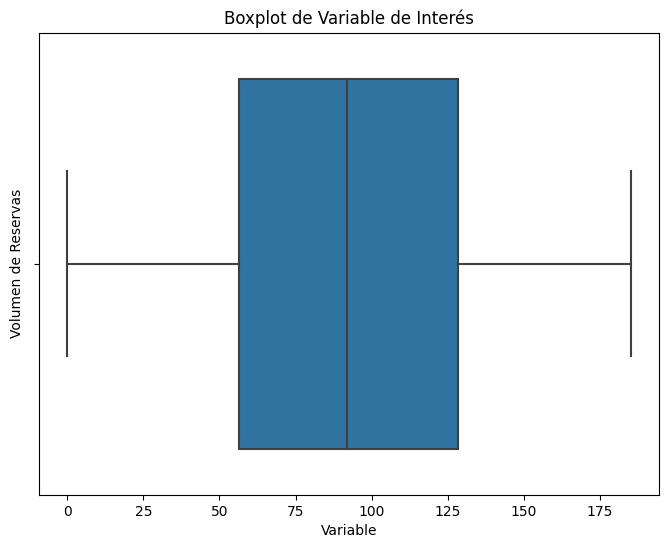

In [7]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_0['product'])

# Añadir título y etiquetas
plt.title('Boxplot de Variable de Interés')
plt.xlabel('Variable')
plt.ylabel('Volumen de Reservas')

# Mostrar el gráfico
plt.show()

In [8]:
# Calcular cuartiles
Q1 = data_0['product'].quantile(0.25)
Q3 = data_0['product'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Límite inferior: {limite_inferior}, Límite superior: {limite_superior}")

# Identificar valores atípicos
valores_atipicos = data_0[(data_0['product'] < limite_inferior) | (data_0['product'] > limite_superior)]

# Remover valores atípicos del DataFrame original
data_0 = data_0[(data_0['product'] >= limite_inferior) & (data_0['product'] <= limite_superior)]
print('Se han removido del dataframe los valores atipicos.')

Límite inferior: -51.60236680760907, Límite superior: 236.66396243896986
Se han removido del dataframe los valores atipicos.


#### Dataframe data_1

In [9]:
# Verificar si hay valores nulos en data_1
if data_1.isnull().values.any():
    print("Hay valores nulos en data_1.")
else:
    print("No hay valores nulos en data_1.")

# Verificar duplicados en data_1
if data_1.duplicated().any():
    print("Hay filas duplicadas en data_1.")
else:
    print("No hay filas duplicadas en data_1.")

No hay valores nulos en data_1.
No hay filas duplicadas en data_1.


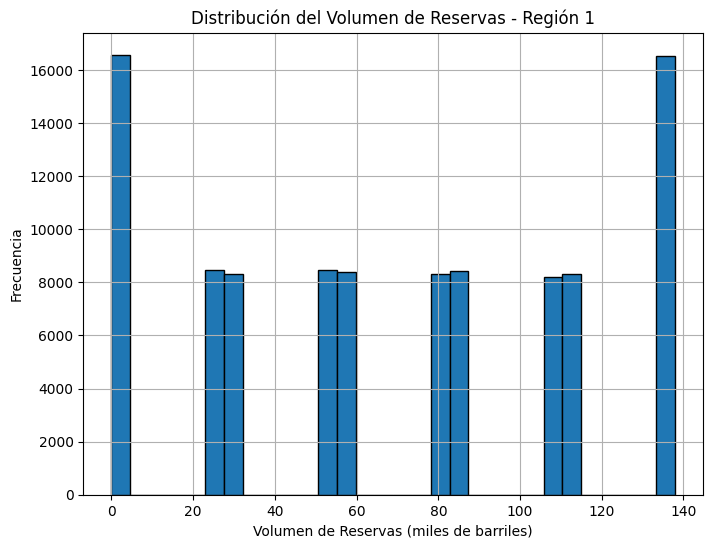

In [10]:
# Histograma del volumen de reservas
plt.figure(figsize=(8, 6))
plt.hist(data_1['product'], bins=30, edgecolor='black')
plt.title('Distribución del Volumen de Reservas - Región 1')
plt.xlabel('Volumen de Reservas (miles de barriles)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [11]:
# Encontrar el valor más pequeño (mínimo) en la columna 'product'
min_value = data_1['product'].min()

# Encontrar el valor más grande (máximo) en la columna 'product'
max_value = data_1['product'].max()

# Encontrar el valor promedio en la columna 'product'
avg_value = data_1['product'].mean()

print(f"Valor mínimo en 'product': {min_value}")
print(f"Valor máximo en 'product': {max_value}")
print(f"Valor promedio en 'product': {avg_value}")

Valor mínimo en 'product': 0.0
Valor máximo en 'product': 137.94540774090564
Valor promedio en 'product': 68.82500000000002


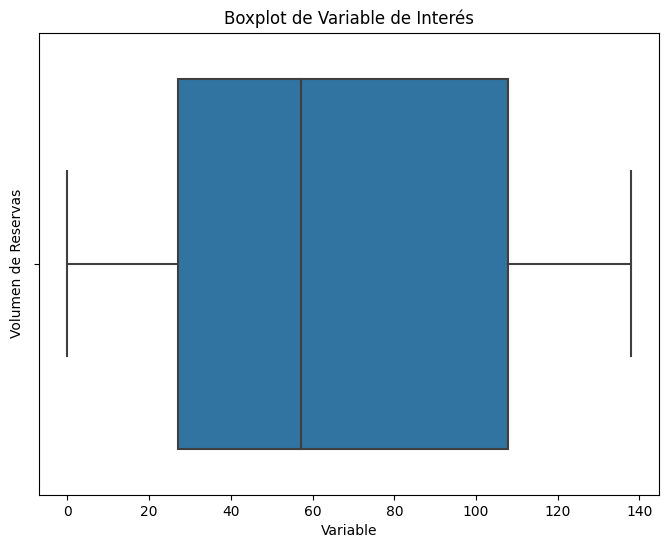

In [12]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_1['product'])

# Añadir título y etiquetas
plt.title('Boxplot de Variable de Interés')
plt.xlabel('Variable')
plt.ylabel('Volumen de Reservas')

# Mostrar el gráfico
plt.show()

In [13]:
# Calcular cuartiles
Q1 = data_1['product'].quantile(0.25)
Q3 = data_1['product'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Límite inferior: {limite_inferior}, Límite superior: {limite_superior}")

# Identificar valores atípicos
valores_atipicos = data_1[(data_1['product'] < limite_inferior) | (data_1['product'] > limite_superior)]

# Remover valores atípicos del DataFrame original
data_1 = data_1[(data_0['product'] >= limite_inferior) & (data_1['product'] <= limite_superior)]
print('Se han removido del dataframe los valores atipicos.')

Límite inferior: -94.33641361038892, Límite superior: 229.10271876808736
Se han removido del dataframe los valores atipicos.


#### Dataframe data_2

In [14]:
# Verificar si hay valores nulos en data_2
if data_2.isnull().values.any():
    print("Hay valores nulos en data_2.")
else:
    print("No hay valores nulos en data_2.")

# Verificar duplicados en data_1
if data_2.duplicated().any():
    print("Hay filas duplicadas en data_2.")
else:
    print("No hay filas duplicadas en data_2.")

No hay valores nulos en data_2.
No hay filas duplicadas en data_2.


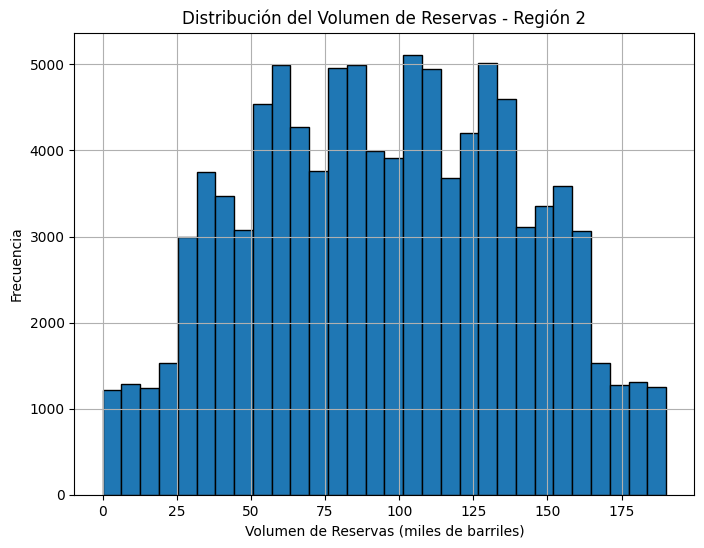

In [15]:
# Histograma del volumen de reservas
plt.figure(figsize=(8, 6))
plt.hist(data_2['product'], bins=30, edgecolor='black')
plt.title('Distribución del Volumen de Reservas - Región 2')
plt.xlabel('Volumen de Reservas (miles de barriles)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [16]:
# Encontrar el valor más pequeño (mínimo) en la columna 'product'
min_value = data_2['product'].min()

# Encontrar el valor más grande (máximo) en la columna 'product'
max_value = data_2['product'].max()

# Encontrar el valor promedio en la columna 'product'
avg_value = data_2['product'].mean()

print(f"Valor mínimo en 'product': {min_value}")
print(f"Valor máximo en 'product': {max_value}")
print(f"Valor promedio en 'product': {avg_value}")

Valor mínimo en 'product': 0.0
Valor máximo en 'product': 190.0298383433513
Valor promedio en 'product': 95.00000000000004


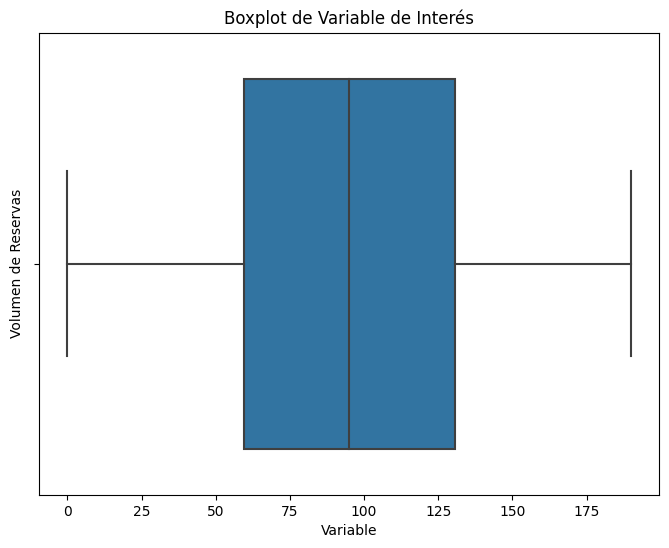

In [17]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_2['product'])

# Añadir título y etiquetas
plt.title('Boxplot de Variable de Interés')
plt.xlabel('Variable')
plt.ylabel('Volumen de Reservas')

# Mostrar el gráfico
plt.show()

In [18]:
# Calcular cuartiles
Q1 = data_2['product'].quantile(0.25)
Q3 = data_2['product'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Límite inferior: {limite_inferior}, Límite superior: {limite_superior}")

# Identificar valores atípicos
valores_atipicos = data_2[(data_2['product'] < limite_inferior) | (data_2['product'] > limite_superior)]

# Remover valores atípicos del DataFrame original
data_2 = data_2[(data_0['product'] >= limite_inferior) & (data_2['product'] <= limite_superior)]
print('Se han removido del dataframe los valores atipicos.')

Límite inferior: -47.26643772727831, Límite superior: 237.31190538130107
Se han removido del dataframe los valores atipicos.


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Excelente, muy bien estos análisis, nos dan una idea muy completa de las features de los datos de cada región

</div>

### Generación del modelo de aprendizaje

Después de revisar los dataframes con rigurosidad, podemos asegurar que los datos ya están preparados para poder entrar al modelo de aprendizaje el cual se estará utilizando el de regresión lineal. 

Para determinar cuál de las tres regiones (geo_data_0, geo_data_1, geo_data_2) es la más adecuada para la perforación de nuevos pozos, se debe seguir un enfoque sistemático que incluye la evaluación de la precisión del modelo, la rentabilidad y el riesgo en cada región. Por esta razón es necesario comparar los valores de RMSE entre las tres regiones ya que entre menor sea el RMSE indica que el modelo tiene menos dispersión y es más preciso.

Al generar el modelo, es necesario definir lo que es el obejtivo y características del modelo siendo el objetivo el producto y las caracteristicas las columnas restantes. Cabe mencionar, que como estamos interesados en predecir el volumen de reservas (product) en nuevos pozos de petróleo basándonos en características geológicas (f0, f1, f2), el campo id no es necesario incluirlo como una característica en el modelo de regresión lineal. 

In [19]:
# Funcion para dividir los datos en conjuntos de entrenamiento (75%) y validación (25%)
def split_data(data):
    features = data.drop(['id', 'product'], axis=1)
    target = data['product']
    return train_test_split(features, target, test_size=0.25, random_state=42)

train_features_0, valid_features_0, train_target_0, valid_target_0 = split_data(data_0)
train_features_1, valid_features_1, train_target_1, valid_target_1 = split_data(data_1)
train_features_2, valid_features_2, train_target_2, valid_target_2 = split_data(data_2)

In [20]:
# División de datos para cada región
train_features_0, valid_features_0, train_target_0, valid_target_0 = split_data(data_0)
train_features_1, valid_features_1, train_target_1, valid_target_1 = split_data(data_1)
train_features_2, valid_features_2, train_target_2, valid_target_2 = split_data(data_2)

# Verificar las dimensiones de los conjuntos de entrenamiento y validación
print(f"Región 0 - Train features shape: {train_features_0.shape}, Train target shape: {train_target_0.shape}")
print(f"Región 0 - Valid features shape: {valid_features_0.shape}, Valid target shape: {valid_target_0.shape}")
print(f"Región 1 - Train features shape: {train_features_1.shape}, Train target shape: {train_target_1.shape}")
print(f"Región 1 - Valid features shape: {valid_features_1.shape}, Valid target shape: {valid_target_1.shape}")
print(f"Región 2 - Train features shape: {train_features_2.shape}, Train target shape: {train_target_2.shape}")
print(f"Región 2 - Valid features shape: {valid_features_2.shape}, Valid target shape: {valid_target_2.shape}")

Región 0 - Train features shape: (75000, 3), Train target shape: (75000,)
Región 0 - Valid features shape: (25000, 3), Valid target shape: (25000,)
Región 1 - Train features shape: (75000, 3), Train target shape: (75000,)
Región 1 - Valid features shape: (25000, 3), Valid target shape: (25000,)
Región 2 - Train features shape: (75000, 3), Train target shape: (75000,)
Región 2 - Valid features shape: (25000, 3), Valid target shape: (25000,)


Unas vez divididos los conjuntos de entrenamiento y prueba de cada región, procedemos a realizar la generación del modelo considerando los siguentes pasos: escalamiento de características, validación cruzada, entrenamiento y evaluación del modelo. 

- Escalamiento de características: Primero, se escalan las características utilizando StandardScaler. Esto asegura que todas las características tengan la misma escala, lo cual es importante para muchos modelos de aprendizaje automático, incluyendo la regresión lineal.

- Validación cruzada: Después de escalar las características, se realiza la validación cruzada. Ésta es una técnica utilizada para evaluar el rendimiento de un modelo de machine learning asegurándose de que funcione bien con datos no vistos. Consiste en dividir el conjunto de datos en varias partes (pliegues), entrenar el modelo múltiples veces usando diferentes combinaciones de estos pliegues para entrenamiento y validación, y luego promediar los resultados. Esto permite obtener una medida más confiable del rendimiento del modelo y ayuda a evitar el sobreajuste, garantizando que el modelo generalice bien a nuevos datos.

- Entrenamiento y evaluación del modelo: Finalmente se entrena y se evalua el modelo obteniendo las predicciones para poder calcular el volumen medio de reservas para cada región y se calcula el RMSE para cada fold tomando el promedio de estos valores para obtener una medida robusta del rendimiento del modelo.

Este enfoque asegura que se utilice una metodología rigurosa para evaluar el rendimiento del modelo, mitigando problemas como el sobreajuste y proporcionando una estimación más realista de la precisión esperada del modelo en datos nuevos no vistos.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien con estos cambios, pero el escalamiento no es necesario para la regresión lineal. Solamente influye si es que tuviese un término de regularización, tal como ocurre en Ridge Regression, LASSO o  Elastic Net.

</div>

In [21]:
# Función para escalar las características
def scale_features(train_features, valid_features):
    scaler = StandardScaler()
    train_features_scaled = scaler.fit_transform(train_features)
    valid_features_scaled = scaler.transform(valid_features)
    return train_features_scaled, valid_features_scaled

In [22]:
# Escalado de características para cada región
train_features_scaled_0, valid_features_scaled_0 = scale_features(train_features_0, valid_features_0)
train_features_scaled_1, valid_features_scaled_1 = scale_features(train_features_1, valid_features_1)
train_features_scaled_2, valid_features_scaled_2 = scale_features(train_features_2, valid_features_2)

In [23]:
# Funcion para entrenar el modelo y calcular las métricas
def train_and_evaluate(train_features, train_target, valid_features, valid_target):
    model = LinearRegression()
    model.fit(train_features, train_target)
    predictions = model.predict(valid_features)
    mean_prediction = np.mean(predictions)
    rmse = mean_squared_error(valid_target, predictions, squared=False)
    return predictions, mean_prediction, rmse

In [24]:
# Validación cruzada para cada región
def cross_validation(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    return rmse_scores

In [25]:
# Generación del modelo
model = LinearRegression()

rmse_scores_0 = cross_validation(model, train_features_scaled_0, train_target_0)
rmse_scores_1 = cross_validation(model, train_features_scaled_1, train_target_1)
rmse_scores_2 = cross_validation(model, train_features_scaled_2, train_target_2)

print('Valores de RMSE con base en la validacion cruzada:')
print(f"Región 0 - RMSE Promedio: {rmse_scores_0.mean():.2f}")
print(f"Región 1 - RMSE Promedio: {rmse_scores_1.mean():.2f}")
print(f"Región 2 - RMSE Promedio: {rmse_scores_2.mean():.2f}")

Valores de RMSE con base en la validacion cruzada:
Región 0 - RMSE Promedio: 37.67
Región 1 - RMSE Promedio: 0.89
Región 2 - RMSE Promedio: 40.03


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Excelente, muy bien!

</div>

Cabe destacar que, entre menor sea el valor de RMSE (Error Cuadrático Medio), habrá una menor dispersión indicando que la predicciones del modelo están más cerca de los valores reales. En otras palabras, un RMSE más bajo significa que el modelo tiende a hacer predicciones más precisas y consistentes en relación con los datos observados. 

In [26]:
# Entrenamiento del modelo y evaluación para cada región
predictions_0, mean_prediction_0, rmse_0 = train_and_evaluate(train_features_scaled_0, train_target_0, valid_features_scaled_0, valid_target_0)
predictions_1, mean_prediction_1, rmse_1 = train_and_evaluate(train_features_scaled_1, train_target_1, valid_features_scaled_1, valid_target_1)
predictions_2, mean_prediction_2, rmse_2 = train_and_evaluate(train_features_scaled_2, train_target_2, valid_features_scaled_2, valid_target_2)

print("Región 0:\nVolumen Medio de Reservas Predicho =", mean_prediction_0,"RMSE =", rmse_0,"\n")
print("Región 1:\nVolumen Medio de Reservas Predicho =", mean_prediction_1,"RMSE =", rmse_1,"\n")
print("Región 2:\nVolumen Medio de Reservas Predicho =", mean_prediction_2,"RMSE =", rmse_2,"\n")

Región 0:
Volumen Medio de Reservas Predicho = 92.39879990657768 RMSE = 37.75660035026169 

Región 1:
Volumen Medio de Reservas Predicho = 68.7128780391376 RMSE = 0.8902801001028845 

Región 2:
Volumen Medio de Reservas Predicho = 94.77102387765939 RMSE = 40.145872311342174 



Retomando un punto importante, el volumen medio de reservas predicho hace referencia al promedio de las cantidades de petróleo que se espera que produzcan los pozos en una región específica, según el modelo de predicción. Esta métrica se calcula tomando el promedio de todas las predicciones de reservas de petróleo para los pozos en el conjunto de validación.

En los resultados obtenidos, se observa que la producción de la zona 2 es mayor pero no con mucha diferencia con respecto a la región 0, no obstante la región 0 presenta menos dispersión en sus datos de acuerdo a su valor rmse siendo ésta una región favorable para la selección de la mayoría de los pozos a implementar. 

Sin embargo, estos resultados no se acercan a la inversión planteada en la siguiente sección ya que el volumen medio de reservas según las predicciones no es suficiente para cubrir el umbral, a continuación se da a conocer esta información:

- Dada la inversión de 100 millones por 200 pozos petrolíferos, de media un pozo petrolífero debe producir al menos un valor de 500,000 dólares en unidades para evitar pérdidas (esto es equivalente a 111.1 unidades). Compara esta cantidad con la cantidad media de reservas en cada región.

In [27]:
# Calcular y mostrar si la cantidad media de reservas es suficiente
required_units = 111.1

print(f"Región 0: ¿Suficiente para cubrir el umbral? {'Sí' if mean_prediction_0 >= required_units else 'No'}")
print(f"Región 1: ¿Suficiente para cubrir el umbral? {'Sí' if mean_prediction_1 >= required_units else 'No'}")
print(f"Región 2: ¿Suficiente para cubrir el umbral? {'Sí' if mean_prediction_2 >= required_units else 'No'}")

# Guardar las predicciones y respuestas correctas para el conjunto de validación
validation_results = {
    'Región 0': (valid_features_0, valid_target_0, predictions_0),
    'Región 1': (valid_features_1, valid_target_1, predictions_1),
    'Región 2': (valid_features_2, valid_target_2, predictions_2)
}

Región 0: ¿Suficiente para cubrir el umbral? No
Región 1: ¿Suficiente para cubrir el umbral? No
Región 2: ¿Suficiente para cubrir el umbral? No


Ya que ninguna de las regiones supera o cubre el umbral establecido, sería prudente considerar no proceder con la inversión hasta que se obtenga más información, se mejoren las condiciones, o se encuentren alternativas más rentables. Sin embargo, si se debe proceder, seleccionar los pozos con mayor predicción de reservas y realizar un análisis de riesgos exhaustivo es esencial para minimizar pérdidas. Es por ello, que para el cálculo de ganacias a continuación, se seleccionan en cada región200 pozos con los valores de predicción más altos para poder hacer una estimación de las ganacias que recibirían. 

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto. El método de exploración/extracción no considera usar pozos promedio, por lo tanto, aún hay oportunidad de tener beneficios.

</div>

### Cálculo de ganancias

En esta parte del proyecto, se estarán seleccionado los 200 pozos de cada región con los valores de predicción más altos para poder después obtener la ganancia que cada región recibiría. En este caso, se están utilizando los datos de validación originales (valid_target_*) junto con las predicciones (predictions_*) para comparar las predicciones con los valores reales de producción, esto se refleja en el cuadro de código anterior con la lista de valid_results.

In [28]:
# Función para seleccionar los mejores 200 pozos por región
def select_top_pozos(predictions_df, region_name):
    top_pozos = predictions_df.sort_values(by='product_prediction', ascending=False).head(200)
    print(f"Top 5 pozos en {region_name}:")
    print(top_pozos.head())
    return top_pozos

# Crear DataFrames de predicciones y producciones reales
predict_region_0 = pd.DataFrame({
    'id': range(1, len(validation_results['Región 0'][2]) + 1),
    'product_prediction': validation_results['Región 0'][2],
    'actual_production': validation_results['Región 0'][1]
})

predict_region_1 = pd.DataFrame({
    'id': range(1, len(validation_results['Región 1'][2]) + 1),
    'product_prediction': validation_results['Región 1'][2],
    'actual_production': validation_results['Región 1'][1]
})

predict_region_2 = pd.DataFrame({
    'id': range(1, len(validation_results['Región 2'][2]) + 1),
    'product_prediction': validation_results['Región 2'][2],
    'actual_production': validation_results['Región 2'][1]
})

# Seleccionar los mejores 200 pozos por región
top_pozos_region_0 = select_top_pozos(predict_region_0, 'Región 0')
top_pozos_region_1 = select_top_pozos(predict_region_1, 'Región 1')
top_pozos_region_2 = select_top_pozos(predict_region_2, 'Región 2')

# Unir los top 200 pozos de todas las regiones
top_pozos_combined = pd.concat([top_pozos_region_0, top_pozos_region_1, top_pozos_region_2])


Top 5 pozos en Región 0:
          id  product_prediction  actual_production
46784   6959          176.536104         153.639837
27658  18195          176.274510         140.631646
6496   17252          173.249504         178.879516
65743    458          172.802708         176.807828
93716   2203          172.744977         130.985681
Top 5 pozos en Región 1:
          id  product_prediction  actual_production
80439  20777          139.983277         137.945408
14041   2324          139.700803         137.945408
62413  13896          139.616544         137.945408
55563   6951          139.514768         137.945408
42432   9152          139.472212         137.945408
Top 5 pozos en Región 2:
          id  product_prediction  actual_production
43931  21853          170.529209         101.225039
84047  10723          169.673332         151.655778
54085   6210          165.300724          92.947333
89165   8204          164.613896          97.775979
64380   8043          163.964000         

Como recordatorio de los datos de este proyecto, el presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares. Además, un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).

In [29]:
# Función para calcular el beneficio
def calculate_profit(top_pozos):
    presupuesto = 100000000  # 100 millones de dólares
    ingreso_por_unidad = 4500  # USD por unidad de volumen

    # Calcular el volumen total de reservas usando los valores reales
    volumen_total = top_pozos['actual_production'].sum()

    # Calcular los ingresos totales esperados
    ingresos_totales = volumen_total * ingreso_por_unidad

    # El costo total de desarrollo es el presupuesto, ya que se desarrollan 200 pozos
    costo_total_desarrollo = presupuesto

    # Calcular la ganancia potencial
    ganancia_potencial = ingresos_totales - costo_total_desarrollo

    return {
        'ingresos_totales': ingresos_totales,
        'costo_total_desarrollo': costo_total_desarrollo,
        'ganancia_potencial': ganancia_potencial
    }

# Calcular el beneficio usando los top 200 pozos combinados
result = calculate_profit(top_pozos_combined)
print(result)

{'ingresos_totales': 383727995.70517796, 'costo_total_desarrollo': 100000000, 'ganancia_potencial': 283727995.70517796}


**Conclusión**

Los resultados del análisis indican que los ingresos totales esperados de los 200 pozos seleccionados son aproximadamente 383,728,000, basados en las predicciones y los valores reales de producción. El costo total de desarrollo de estos pozos es 100,000,000, cubriendo todos los gastos necesarios para ponerlos en funcionamiento. Después de deducir este costo, la ganancia potencial es de aproximadamente 283,728,000, lo que representa una rentabilidad sustancial. La relación de ganancia es casi 2.84 veces el costo de desarrollo, indicando que la inversión en estos pozos es altamente rentable.

Este análisis también resalta la importancia de la precisión de las predicciones del modelo y su alineación con los valores reales de producción. Si las predicciones son precisas, el modelo puede considerarse eficaz en la selección de pozos rentables. Sin embargo, es crucial monitorear y actualizar regularmente las predicciones del modelo para mantener su exactitud y relevancia, considerando también la variabilidad en los precios del mercado y los costos operativos que pueden influir en los ingresos totales y la ganancia potencial.

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Debes corregir esta función.    
    
Para calcular el beneficio debes usar los valores reales de los top 200 pozos según el valor de predicción, ojo con eso puesto que el input de esta función, tal como veo que lo quieres hacer, no puede ser el valor de predicción por si solo sino que tiene que venir el valor real de alguna forma. 
    
Por otro lado, el beneficio no tiene los cálculos correctos. El costo de desarrollo de los 200 pozos son 100 millones y cada unidad de volumen de los pozos da 4500 de ingreso.

</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
    
Corregido muchas gracias, cualquier cuestión estoy al pendiente de su respuesta. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Muy bien, corregido!
</div>

### Riesgos y ganancias

Utilizando las predicciones almacenadas, se emplea la técnica del bootstrapping con 1000 muestras para hallar la distribución de los beneficios.
También encontraremos el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas. La pérdida es una ganancia negativa, calcúlala como una probabilidad y luego exprésala como un porcentaje.

In [30]:
# Función para calcular el beneficio para una muestra de pozos
def calculate_profit_for_sample(sample):
    presupuesto = 100000000  # 100 millones de dólares
    ingreso_por_unidad = 4500  # USD por unidad de volumen

    # Seleccionar los mejores 200 pozos de la muestra
    top_pozos = sample.sort_values(by='product_prediction', ascending=False).head(200)

    # Calcular el volumen total de reservas usando los valores reales
    volumen_total = top_pozos['actual_production'].sum()

    # Calcular los ingresos totales esperados
    ingresos_totales = volumen_total * ingreso_por_unidad

    # El costo total de desarrollo es el presupuesto, ya que se desarrollan 200 pozos
    costo_total_desarrollo = presupuesto

    # Calcular la ganancia potencial
    ganancia_potencial = ingresos_totales - costo_total_desarrollo

    return ganancia_potencial

# Función para realizar bootstrapping y calcular estadísticas
def bootstrap_profit(dataframe, n_samples=1000, sample_size=500):
    profits = []
    for _ in range(n_samples):
        # Generar una muestra bootstrap de 500 pozos
        sample = dataframe.sample(n=sample_size, replace=True)
        
        # Calcular el beneficio para esta muestra bootstrap
        ganancia_potencial = calculate_profit_for_sample(sample)
        
        profits.append(ganancia_potencial)
    
    # Convertir lista de ganancias a un array de numpy para facilitar cálculos estadísticos
    profits = np.array(profits)
    
    # Calcular la media de las ganancias
    media_ganancias = np.mean(profits)
    
    # Calcular el intervalo de confianza (percentiles 2.5% y 97.5%)
    intervalo_confianza = np.percentile(profits, [2.5, 97.5])
    
    # Calcular el riesgo (porcentaje de veces que el beneficio fue negativo)
    riesgo = np.mean(profits < 0)
    
    return {
        'media_ganancias': media_ganancias,
        'intervalo_confianza': intervalo_confianza,
        'riesgo': riesgo
    }

In [31]:
# Realizar bootstrapping para cada región
bootstrap_results_region_0 = bootstrap_profit(predict_region_0)
bootstrap_results_region_1 = bootstrap_profit(predict_region_1)
bootstrap_results_region_2 = bootstrap_profit(predict_region_2)

# Mostrar resultados
print("Resultados de bootstrapping:")
print("Región 0:")
print(f"Media de ganancias: ${bootstrap_results_region_0['media_ganancias']:,.2f}")
print(f"Intervalo de confianza (2.5% - 97.5%): ${bootstrap_results_region_0['intervalo_confianza'][0]:,.2f} - ${bootstrap_results_region_0['intervalo_confianza'][1]:,.2f}")
print(f"Riesgo (porcentaje de veces con beneficio negativo): {bootstrap_results_region_0['riesgo']*100:.2f}%")
print()

print("Región 1:")
print(f"Media de ganancias: ${bootstrap_results_region_1['media_ganancias']:,.2f}")
print(f"Intervalo de confianza (2.5% - 97.5%): ${bootstrap_results_region_1['intervalo_confianza'][0]:,.2f} - ${bootstrap_results_region_1['intervalo_confianza'][1]:,.2f}")
print(f"Riesgo (porcentaje de veces con beneficio negativo): {bootstrap_results_region_1['riesgo']*100:.2f}%")
print()

print("Región 2:")
print(f"Media de ganancias: ${bootstrap_results_region_2['media_ganancias']:,.2f}")
print(f"Intervalo de confianza (2.5% - 97.5%): ${bootstrap_results_region_2['intervalo_confianza'][0]:,.2f} - ${bootstrap_results_region_2['intervalo_confianza'][1]:,.2f}")
print(f"Riesgo (porcentaje de veces con beneficio negativo): {bootstrap_results_region_2['riesgo']*100:.2f}%")

Resultados de bootstrapping:
Región 0:
Media de ganancias: $3,866,901.43
Intervalo de confianza (2.5% - 97.5%): $-1,074,030.77 - $8,656,327.93
Riesgo (porcentaje de veces con beneficio negativo): 5.70%

Región 1:
Media de ganancias: $4,412,768.75
Intervalo de confianza (2.5% - 97.5%): $609,023.17 - $8,173,502.53
Riesgo (porcentaje de veces con beneficio negativo): 1.00%

Región 2:
Media de ganancias: $3,966,021.99
Intervalo de confianza (2.5% - 97.5%): $-1,105,170.56 - $8,972,851.47
Riesgo (porcentaje de veces con beneficio negativo): 6.90%


Con base en los resultados del bootstrapping para las tres regiones analizadas, podemos extraer varias conclusiones significativas. En primer lugar, la Región 1 muestra la media de ganancias más alta, indicando un mayor potencial promedio de beneficio al desarrollar los pozos seleccionados. Además, tiene el intervalo de confianza más estrecho, lo que sugiere una menor variabilidad en las estimaciones de ganancias en comparación con las otras regiones. Por otro lado, aunque las Regiones 0 y 2 también muestran un potencial considerable de ganancias, presentan intervalos de confianza más amplios que incluyen tanto pérdidas como ganancias significativas. La Región 2 destaca por tener el riesgo más alto de obtener una ganancia negativa, mientras que la Región 0 también muestra un riesgo significativo aunque ligeramente menor. Estas diferencias en riesgo y potencial de ganancias pueden influir en las decisiones estratégicas sobre dónde y cómo asignar recursos para el desarrollo de pozos, considerando tanto la rentabilidad esperada como el nivel de riesgo asumido.

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

En el muestreo aleatorio de bootstrapping debes tomar una muestra de 500 pozos. Luego, sobre esos 200, debes realizar el cálculo de beneficio tal cual como se realizó anteriormente.
    
Con el resultado de boostrapping (los 1000 beneficios) debes calcular la media, el intervalo de confianza (calcula el percentil 2.5% y 97.5% de los resultados) y el riesgo (porcentaje de veces que el beneficio fue negativo.
    
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
    
Corregido muchas gracias, cualquier cuestión estoy al pendiente de su respuesta. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Excelente, bien hecho!
</div>